In [ ]:
%matplotlib inline
import ROOT
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

ROOT.gROOT.LoadMacro("../atlasstyle/AtlasStyle.C")
ROOT.gROOT.LoadMacro("../atlasstyle/AtlasUtils.C")
ROOT.gROOT.LoadMacro("../atlasstyle/AtlasLabels.C")
ROOT.SetAtlasStyle()

ROOT.EnableImplicitMT()
# ROOT.gROOT.SetBatch(True)

delphes_dir = "~/research/Delphes-3.5.0/"
status = ROOT.gSystem.Load(delphes_dir + "libDelphes.so")

# save_folder = "dark_plots"
save_folder = "prompt_half_dark_plots"
# save_folder = "displaced_half_dark_plots"

if status == 0:
    print("libDelphes.so loaded successfully!")
else:
    print("Error: Could not load libDelphes.so")
    exit()
    
# fdir = delphes_dir + "displacedPhoton/dark_events.root"
fdir = delphes_dir + "displacedPhoton/prompt_half_dark_events.root"
# fdir = delphes_dir + "displacedPhoton/displaced_half_dark_events.root"


Applying ATLAS style settings...

libDelphes.so loaded successfully!


In [2]:
# Create the RDataFrame
df = ROOT.RDataFrame("Delphes", fdir)

# Filter out events that have no photons to prevent errors
df_photons = df.Filter("Photon_size > 0", "Events with at least one photon")

# First, define the index for the highest pT photon
df_with_max_idx = df_photons.Define("sorted_indices", "ROOT::VecOps::Argsort(Photon.PT)") \
                            .Define("idx_max_pt", "sorted_indices.back()") \
                            .Define("idx_second_max_pt", "sorted_indices[sorted_indices.size() - 2]")

# Use the index to get the Eta and Phi of that specific photon
df_final = df_with_max_idx.Define("pt_max_pt", "Photon.PT[idx_max_pt]") \
                          .Define("eta_max_pt", "Photon.Eta[idx_max_pt]") \
                          .Define("phi_max_pt", "Photon.Phi[idx_max_pt]") # \

### Plots for leading photon

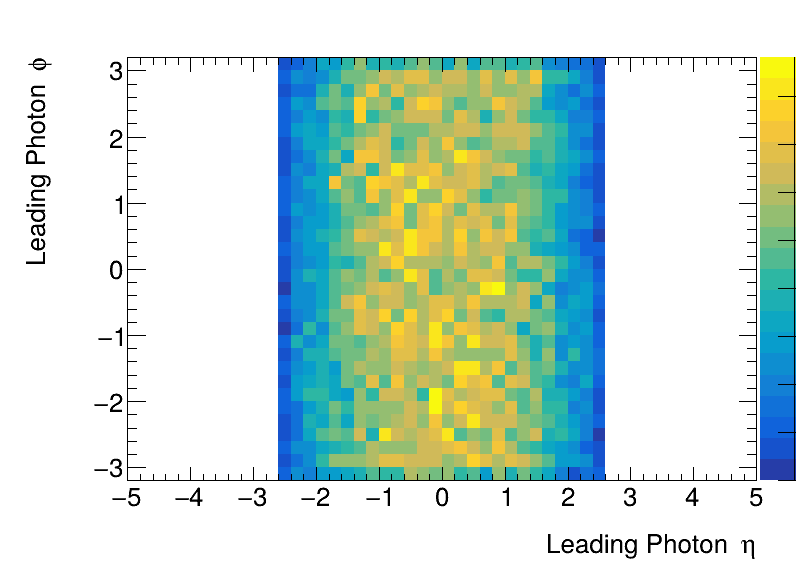

Info in <TCanvas::Print>: png file displaced_half_dark_plots/eta_vs_phi_rdf.png has been created


In [ ]:
# Book the 2D histogram action.
# The histogram is filled from the columns "eta_max_pt" and "phi_max_pt".
hist_model = ROOT.RDF.TH2DModel("hist_eta_phi", "Eta vs Phi;Leading Photon #eta;Leading Photon #phi", 50, -5, 5, 32, -3.2, 3.2)
hist_eta_phi = df_final.Histo2D(hist_model, "eta_max_pt", "phi_max_pt")

# --- Drawing ---
c = ROOT.TCanvas("c", "Eta vs Phi of Highest pT Photon", 800, 600)
hist_eta_phi.SetStats(0)
c.SetTopMargin(0.1)  # Adjust the top margin to make space for the title
hist_eta_phi.SetTitle("Eta vs Phi of Highest pT Photon")
hist_eta_phi.Draw("COLZ")
c.SaveAs(f"{save_folder}/leading_photon_eta_vs_phi.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/leading_photon_eta_vs_phi.png")

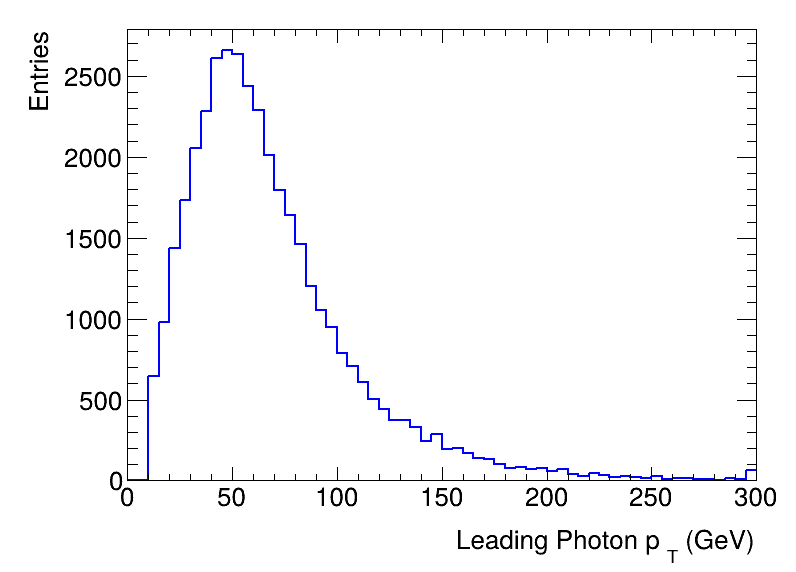

Info in <TCanvas::Print>: png file displaced_half_dark_plots/leading_photon_pt.png has been created


In [4]:
# Book the 1D histogram action for pt_max_pt
hist_model_pt = ROOT.RDF.TH1DModel("hist_pt", "pT of Highest pT Photon;Leading Photon p_{T} (GeV);Entries", 60, 0, 300)
hist_pt = df_final.Histo1D(hist_model_pt, "pt_max_pt")
hist_pt.SetLineColor(4)

# Create a clone of the histogram to modify it
hist_with_overflow = hist_pt.Clone("hist_with_overflow")

# Add the overflow content to the last bin
overflow_bin_content = hist_with_overflow.GetBinContent(hist_with_overflow.GetNbinsX() + 1)
last_bin_content = hist_with_overflow.GetBinContent(hist_with_overflow.GetNbinsX())
hist_with_overflow.SetBinContent(hist_with_overflow.GetNbinsX(), last_bin_content + overflow_bin_content)

# Trigger the event loop and draw the histogram
c_pt = ROOT.TCanvas("c_pt", "pT of Highest pT Photon", 800, 600)
hist_with_overflow.SetStats(0)
hist_with_overflow.Draw()
c_pt.SaveAs(f"{save_folder}/leading_photon_pt.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/leading_photon_pt.png")

### Plots for MissingET

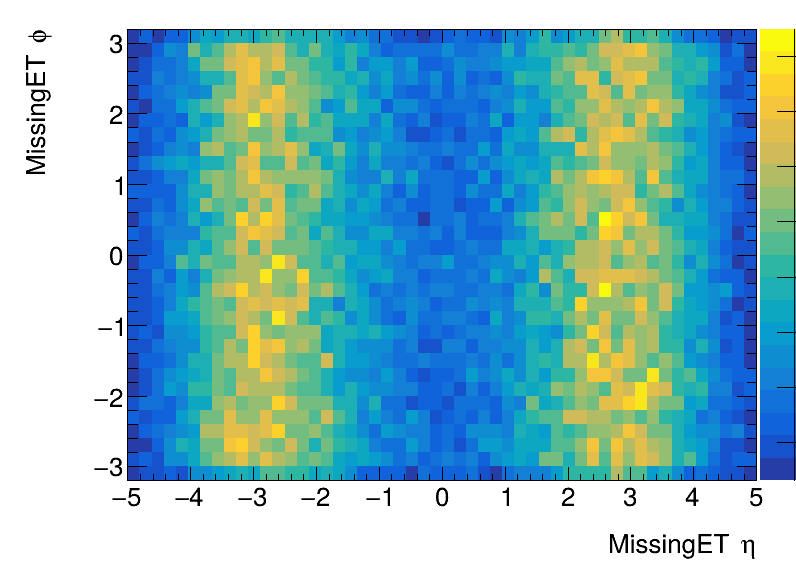

Info in <TCanvas::Print>: png file displaced_half_dark_plots/missing_et_eta_vs_phi.png has been created


In [5]:
# Book the 2D histogram action for missing ET
hist_model_met = ROOT.RDF.TH2DModel("hist_met_eta_phi", "Missing ET Eta vs Phi;MissingET #eta;MissingET #phi", 52, -5, 5, 32, -3.2, 3.2)
hist_met_eta_phi = df.Filter("MissingET_size > 0", "Events with Missing ET") \
                     .Histo2D(hist_model_met, "MissingET.Eta", "MissingET.Phi")

# --- Drawing ---
c_met = ROOT.TCanvas("c_met", "Missing ET Eta vs Phi", 800, 600)
hist_met_eta_phi.SetStats(0)
hist_met_eta_phi.Draw("COLZ")
c_met.SaveAs(f"{save_folder}/missing_et_eta_vs_phi.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/missing_et_eta_vs_phi.png")

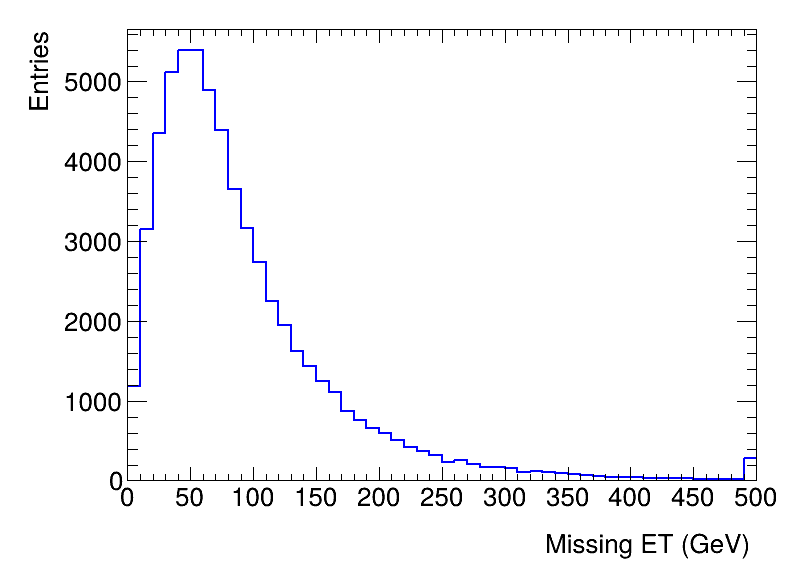

Info in <TCanvas::Print>: png file displaced_half_dark_plots/missing_et_pt.png has been created


In [ ]:
# Book the 1D histogram action for missingET.MET
hist_model_met_pt = ROOT.RDF.TH1DModel("hist_met_pt", "Missing ET;Missing ET (GeV);Entries", 50, 0, 500)
hist_met_pt = df.Filter("MissingET_size > 0", "Events with Missing ET") \
                .Histo1D(hist_model_met_pt, "MissingET.MET")
hist_met_pt.SetLineColor(4)

# Create a clone of the histogram to modify it  
hist_met_with_overflow = hist_met_pt.Clone("hist_met_with_overflow")

# Add the overflow content to the last bin
overflow_bin_content_met = hist_met_with_overflow.GetBinContent(hist_met_with_overflow.GetNbinsX() + 1)
last_bin_content_met = hist_met_with_overflow.GetBinContent(hist_met_with_overflow.GetNbinsX())
hist_met_with_overflow.SetBinContent(hist_met_with_overflow.GetNbinsX(), last_bin_content_met + overflow_bin_content_met)

# Trigger the event loop and draw the histogram
c_met_pt = ROOT.TCanvas("c_met_pt", "Missing ET", 800, 600)
hist_met_with_overflow.SetStats(0)
hist_met_with_overflow.Draw()
c_met_pt.SaveAs(f"{save_folder}/missing_et_pt.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/missing_et_pt.png")

### Plots for maximal Photon.T (photon time)

In [2]:
# Create the RDataFrame
df_init = ROOT.RDataFrame("Delphes", fdir)

# Set the time cut for selecting displaced candidates (in nanoseconds)
TIME_CUT_NS = 12.**(-9)

# Filter for events with at least one photon
df_photons = df_init.Filter("Photon_size > 0", "Events with at least one photon")

# Filter for events containing at least one late-arriving photon
df_late = df_photons.Filter(f"ROOT::VecOps::Max(Photon.T) > {TIME_CUT_NS}", "Select events with late photons")

# In these events, find the index of the LATEST arriving photon
df_final = df_late.Define("idx_late_photon", "ROOT::VecOps::ArgMax(Photon.T)") \
                  .Define("pt_late_photon", "Photon.PT[idx_late_photon]") \
                  .Define("eta_late_photon", "Photon.Eta[idx_late_photon]") \
                  .Define("phi_late_photon", "Photon.Phi[idx_late_photon]") \
                  .Define("t_late_photon", "Photon.T[idx_late_photon]") \
                  .Define("e_late_photon", "Photon.E[idx_late_photon]") \
                  .Define("theta_late_photon", "2 * TMath::ATan(TMath::Exp(-eta_late_photon))") \
                  .Define("e_theta_late_photon", "TMath::ASin(pt_late_photon / e_late_photon)") \
                  .Define("photon_t", "Photon.T * 1e9")


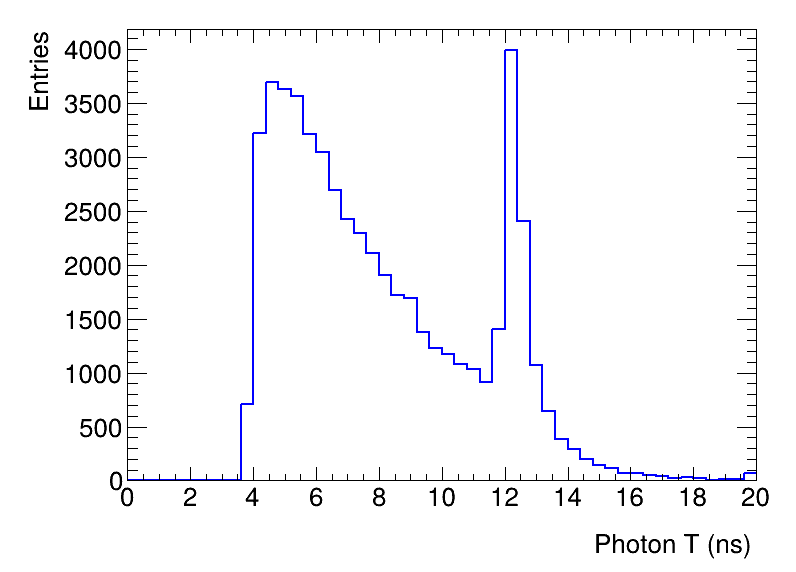

Info in <TCanvas::Print>: png file displaced_half_dark_plots/photon_t.png has been created


In [3]:
# Book the 1D histogram action for Photon.T
hist_model_photon_t = ROOT.RDF.TH1DModel("hist_photon_t", "Photon T;Photon T (ns);Entries", 50, 0, 20)
hist_photon_t = df_final.Histo1D(hist_model_photon_t, "photon_t")
hist_photon_t.SetLineColor(4)

# Create a clone of the histogram to modify it
hist_photon_t_with_overflow = hist_photon_t.Clone("hist_photon_t_with_overflow")

# Add the overflow content to the last bin
overflow_bin_content_t = hist_photon_t_with_overflow.GetBinContent(hist_photon_t_with_overflow.GetNbinsX() + 1)
last_bin_content_t = hist_photon_t_with_overflow.GetBinContent(hist_photon_t_with_overflow.GetNbinsX())
hist_photon_t_with_overflow.SetBinContent(hist_photon_t_with_overflow.GetNbinsX(), last_bin_content_t + overflow_bin_content_t)

# Trigger the event loop and draw the histogram
c_photon_t = ROOT.TCanvas("c_photon_t", "Photon T", 800, 600)
hist_photon_t_with_overflow.SetStats(0)
hist_photon_t_with_overflow.Draw()
c_photon_t.SaveAs(f"{save_folder}/photon_t.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/photon_t.png")

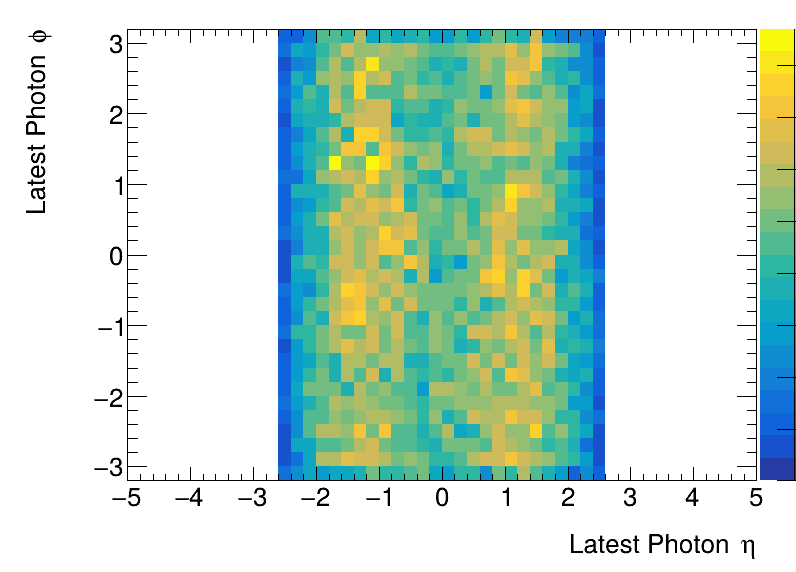

Info in <TCanvas::Print>: png file displaced_half_dark_plots/eta_vs_phi_late.png has been created


In [3]:
# Book the 2D histogram action.
# The histogram is filled from the columns "eta_max_pt" and "phi_max_pt".
hist_model = ROOT.RDF.TH2DModel("hist_eta_phi", "Eta vs Phi;Latest Photon #eta;Latest Photon #phi", 50, -5, 5, 32, -3.2, 3.2)
hist_eta_phi = df_final.Histo2D(hist_model, "eta_late_photon", "phi_late_photon")

# --- Drawing ---
c = ROOT.TCanvas("c", "Eta vs Phi of Latest Arrival Photon", 800, 600)
hist_eta_phi.SetStats(0)
hist_eta_phi.Draw("COLZ")
c.SaveAs(f"{save_folder}/eta_vs_phi_late.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/eta_vs_phi_late.png")

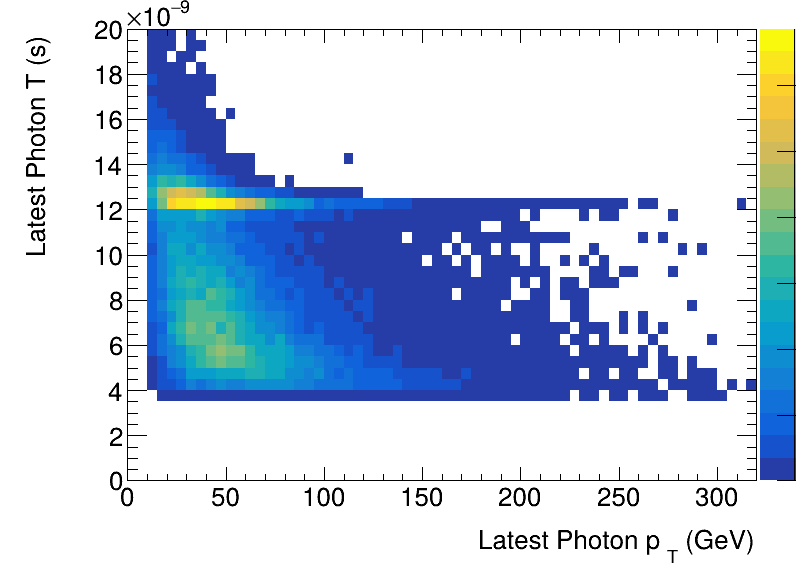

Info in <TCanvas::Print>: png file displaced_half_dark_plots/pt_vs_t_late.png has been created


In [3]:
# Book the 2D histogram action.
# The histogram is filled from the columns "pt_late_photon" and "t_late_photon".
hist_model = ROOT.RDF.TH2DModel("hist_pt_t", "p_{T} vs T;Latest Photon p_{T} (GeV);Latest Photon T (s)", 64, 0, 320, 40, 0, 20*10**-9)
hist_pt_t = df_final.Histo2D(hist_model, "pt_late_photon", "t_late_photon")

# --- Drawing ---
c = ROOT.TCanvas("c", "pT vs T of Latest Arrival Photon", 800, 600)
hist_pt_t.SetStats(0)
hist_pt_t.Draw("COLZ")
c.SaveAs(f"{save_folder}/pt_vs_t_late.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/pt_vs_t_late.png")

In [ ]:
# Book the 2D histogram action.
# The histogram is filled from the columns "theta_late_photon" and "e_theta_late_photon".
hist_model = ROOT.RDF.TH2DModel("hist_theta_e", "#theta vs E_#theta;Photon #theta;Photon E_#theta", 64, 0, 3.2, 64, 0, 3.2)
hist_theta_e = df_final.Histo2D(hist_model, "theta_late_photon", "e_theta_late_photon")

# --- Drawing ---
c = ROOT.TCanvas("c", "#theta vs E_#theta of Latest Arrival Photon", 800, 600)
hist_theta_e.SetStats(0)
hist_theta_e.Draw("COLZ")
c.SaveAs(f"{save_folder}/theta_vs_e_theta_late.png")

# Display the image in the notebook
Image(filename=f"{save_folder}/theta_vs_e_theta_late.png")

: 